<a href="https://colab.research.google.com/github/Silambarasan92-spec/Assignment6/blob/main/Assignment_6(BrainvsBody)_Silambarasan_G_DW28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(-70.80375000000001, 119.60625)

In [ ]:
df.Brain = df.Brain.clip(-70.80375000000001, 119.60625)

In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(-238.375, 408.625)

In [ ]:
df.Body = df.Body.clip(-238.375, 408.625)

In [ ]:
df.shape

(62, 2)

In [ ]:
df.groupby('Brain')['Body'].mean()

Brain
0.00500        0.1400
0.01000        0.2500
0.02300        0.3500
0.04800        0.3300
0.06000        1.0000
0.07500        1.2000
0.10100        4.0000
0.10400        2.5000
0.12000        1.0000
0.12200        3.0000
0.20000        5.0000
0.28000        1.9000
0.42500        6.4000
0.48000       15.5000
0.55000        2.4000
0.75000       12.3000
0.78500        3.5000
0.90000        2.6000
0.92000        5.7000
1.00000        6.6000
1.04000        5.5000
1.35000        8.1000
1.40000       12.5000
1.41000       17.5000
1.62000       11.4000
1.70000        6.3000
2.00000       12.3000
2.50000       12.1000
3.00000       25.0000
3.30000       25.6000
3.38500       44.5000
3.50000        7.3500
3.60000       21.0000
4.05000       17.0000
4.19000       58.0000
4.23500       50.4000
4.28800       39.2000
6.80000      179.0000
10.00000     115.0000
10.55000     179.5000
14.83000      98.2000
27.66000     115.0000
35.00000      56.0000
36.33000     119.5000
52.16000     408.6250
55.5

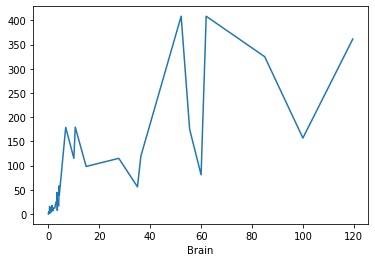

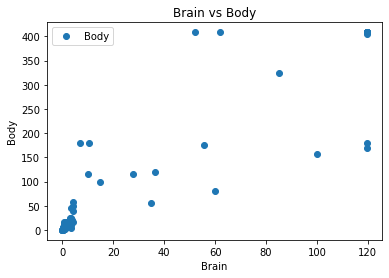

In [ ]:
import matplotlib.pyplot as plt# EDA
df.groupby('Brain')['Body'].mean().plot()
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [ ]:
X = df[['Brain']].values #array of features
y = df['Body'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =6 )

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
from sklearn.linear_model import LinearRegression# MODEL TRAING
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Brain'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Brain,123.179967


In [ ]:
regressor.predict(scaler.transform(np.array([[120]])))

array([356.25330918])

In [ ]:
regressor.intercept_ # c 

96.05959183673471

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,408.625,355.140695
1,5.500,20.109505
2,44.500,26.735742
3,2.500,17.464661
4,179.000,36.385465
5,115.000,45.427666
6,0.250,17.199046
7,408.625,355.140695
8,1.900,17.961982
9,175.000,173.996455


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8949628776103085
